In [258]:
import pandas as pd
import numpy as np

# **30 MENIT**

## **100% Watercut**

In [259]:
# Baca Well Identity
df_wellidentity = pd.read_csv("Well Identity.csv")

# Ambil nama sheet dari Well Identity (baris pertama)
sheet_name = df_wellidentity.loc[0, "Well Identity"]

# Baca Excel sesuai sheet_name yang diambil dari Well Identity
df_wc = pd.read_excel("D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Zona 11\Kajian Analisis Data LPO dan Digitalisasi\ZONA 11 (ESP)\ESP History SKW\Production SKW.xlsx", sheet_name=str(sheet_name))

In [260]:
# --- Hapus baris index 0-5 dan reset index ---
df_wc = df_wc.iloc[6:].reset_index(drop=True)

In [261]:
# Ambil hanya kolom sampai 'Unnamed: 11' saja
df_wc = df_wc.iloc[:, :12]   # ambil 12 kolom pertama (0 sampai 11)

In [262]:
df_wc

,SUKOWATI - 33,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2025-03-07 00:00:00,175,128,0,0,0,0,0,-,-,516934.905569,516.934906
1,2025-03-08 00:00:00,175,128,24,0,1134.553183,1134.553183,97.832908,100,-,516934.905569,516.934906
2,2025-03-09 00:00:00,165,128,24,0,1315.636364,1315.636364,186.363636,100,-,516934.905569,516.934906
3,2025-03-10 00:00:00,160,102,24,0,1315.636364,1315.636364,186.363636,100,-,516934.905569,516.934906
4,2025-03-11 00:00:00,160,102,24,0,1333.090909,1333.090909,256.727273,100.0,-,516934.905569,516.934906
...,...,...,...,...,...,...,...,...,...,...,...,...
128,2025-07-13 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906
129,2025-07-14 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906
130,2025-07-15 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906
131,2025-07-16 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906


In [263]:
# --- Ubah nama kolom sesuai permintaan ---
df_wc.columns = [
    "Date", "FWHP", "CHOKE", "TIME PROD", "OIL", "WATER", 
    "GROSS", "GAS", "WC", "GOR", "CUMM OIL", "CUMM OIL (2)"
]

In [264]:
df_wc

,Date,FWHP,CHOKE,TIME PROD,OIL,WATER,GROSS,GAS,WC,GOR,CUMM OIL,CUMM OIL (2)
0,2025-03-07 00:00:00,175,128,0,0,0,0,0,-,-,516934.905569,516.934906
1,2025-03-08 00:00:00,175,128,24,0,1134.553183,1134.553183,97.832908,100,-,516934.905569,516.934906
2,2025-03-09 00:00:00,165,128,24,0,1315.636364,1315.636364,186.363636,100,-,516934.905569,516.934906
3,2025-03-10 00:00:00,160,102,24,0,1315.636364,1315.636364,186.363636,100,-,516934.905569,516.934906
4,2025-03-11 00:00:00,160,102,24,0,1333.090909,1333.090909,256.727273,100.0,-,516934.905569,516.934906
...,...,...,...,...,...,...,...,...,...,...,...,...
128,2025-07-13 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906
129,2025-07-14 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906
130,2025-07-15 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906
131,2025-07-16 00:00:00,165,S/I,0,0,0,0,0,-,-,516934.905569,516.934906


## **Fail Pred**

In [265]:
df_ori = pd.read_csv('SKW_final_w_Pd.csv', parse_dates=['Reading Time'])

In [266]:
df11 = pd.read_csv('X_predict_30menit.csv')

In [267]:
df_all = pd.read_csv('df_all.csv')

In [268]:
slopes_df = pd.read_csv('slopes_df_30menit.csv')

In [269]:
from joblib import load

KNN = load(r'D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Sept 4 2025\Fail Prediction\Train dengan SKW dan Previous Data_v3\knn_tanpa SMOTE_model.pkl')

In [270]:
df_all.head()

,Reading Time,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Discharge Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw),Virtual Rate (BFPD) (Raw)
0,2025-03-03 17:00:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
1,2025-03-03 17:30:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
2,2025-03-03 18:00:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
3,2025-03-03 18:30:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
4,2025-03-03 19:00:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0


In [271]:
slopes_df.head()

,Window_Start_Time,A,IP,DP,IT,MT,V,R
0,2025-03-03 17:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-03-03 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-03-03 18:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-03-03 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-03-03 19:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
df11.head()

,A,IP,DP,IT,MT,V,R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
predictions = KNN.predict(df11)

In [274]:
def status(x):
    x = int(x)
    if(x==0):
        return "Running"
    elif(x==1):
        return "Low PI"
    elif(x==2):
        return "Pump Wear"
    elif(x==3):
        return "Tubing Leak"
    elif(x==4):
        return "Higher PI"
    elif(x==5):
        return "Increase in Frequency"
    elif(x==6):
        return "Open Choke"
    elif(x==7):
        return "Increase in Watercut"
    elif(x==8):
        return "Sand Ingestion"
    elif(x==9):
        return "Closed Valve"
    else:
        return "Unidentified"

def recommendation(x):
    x = int(x)
    if(x==0):
        return " "
    elif(x==1):
        print ("The Possibility Causes: \n 1. Well productivity less than pump design range \n 2. Restricted pump")
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Analyze the fluid level and Bottom Hole Pressure (BHP) data! \n   If in acceptable range, Adjust the tubing well head pressure and bring the pump production rate within design rate', end = '\n')
        print ('2. Check the possibility of restricted pump! \n   Pumping fluids through tubing when water sources are available.')
    elif(x==2):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Verify if vibration have increased by 20% from the pump install date', end = '\n')
        print ('2. Do shut-in test while the surface check valve is closed, and the pump is running')
    elif(x==3):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Confirm by a pressure test at the tubing wellhead', end = '\n')
        print ('2. Meanwhile, fill up the tubing and pressure up against RCV')
    elif(x==4):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Adjust the tubing well head pressure and bring the pump production rate within design rate', end = '\n')
        print ('2. Conduct the fluid analysis as a basis for re-design pump')
    elif(x==5):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Lower the value of frequency using VSD.', end = '\n')
        print ('2. Check the pump discharge pressure and compare to previous well data history')
    elif(x==6):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('Analyze the fluid level and Bottom Hole Pressure (BHP) data!')
    elif(x==7):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Analyze the fluid level and Bottom Hole Pressure (BHP) data!', end = '\n')
        print ('2. Adjust the tubing well head pressure and bring the pump production rate within design rate')
    elif(x==8):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Check flow line and separator for evidence of sand, mud, or debris.', end = '\n')
        print ('2. Design solid control system for next installation')
    elif(x==9):
        print ('NOTIFICATIONS FOR ENGINEER!')
        print ('1. Verify if the valve was deliberately partially closed by Field Service Tech', end = '\n')
        print ('2. Contact the Field Service Tech to check out well on location')
    else:
        return "Unidentified"

In [275]:
# Create a DataFrame with window start times and predictions
prediction_results_df = pd.DataFrame({
    'Window_Start_Time': slopes_df['Window_Start_Time'],
    'Prediction': predictions
})

# Apply the status and recommendation functions
prediction_results_df['Status'] = prediction_results_df['Prediction'].apply(status)
prediction_results_df['Recommendation'] = prediction_results_df['Prediction'].apply(recommendation)


# Display the results
display(prediction_results_df.head())

NOTIFICATIONS FOR ENGINEER!
1. Lower the value of frequency using VSD.
2. Check the pump discharge pressure and compare to previous well data history
NOTIFICATIONS FOR ENGINEER!
1. Analyze the fluid level and Bottom Hole Pressure (BHP) data!
2. Adjust the tubing well head pressure and bring the pump production rate within design rate
The Possibility Causes: 
 1. Well productivity less than pump design range 
 2. Restricted pump
NOTIFICATIONS FOR ENGINEER!
1. Analyze the fluid level and Bottom Hole Pressure (BHP) data! 
   If in acceptable range, Adjust the tubing well head pressure and bring the pump production rate within design rate
2. Check the possibility of restricted pump! 
   Pumping fluids through tubing when water sources are available.
The Possibility Causes: 
 1. Well productivity less than pump design range 
 2. Restricted pump
NOTIFICATIONS FOR ENGINEER!
1. Analyze the fluid level and Bottom Hole Pressure (BHP) data! 
   If in acceptable range, Adjust the tubing well head 

,Window_Start_Time,Prediction,Status,Recommendation
0,2025-03-03 17:30:00,0,Running,
1,2025-03-03 18:00:00,0,Running,
2,2025-03-03 18:30:00,0,Running,
3,2025-03-03 19:00:00,0,Running,
4,2025-03-03 19:30:00,0,Running,


In [276]:
# # Loop cek kondisi dengan toleransi
# for idx, row in prediction_results_df.iterrows():
#     # Cek di df_all
#     match_row = df_all[df_all["Reading Time"] == row["Window_Start_Time"]]
#     # Cek di slopes_df
#     slope_row = slopes_df[slopes_df["Window_Start_Time"] == row["Window_Start_Time"]]

#     if not match_row.empty and not slope_row.empty:
#         amps = match_row["Average Amps (A) (Raw)"].iloc[0]
#         freq = match_row["Drive Frequency (Hz) (Raw)"].iloc[0]
#         rate = match_row["Virtual Rate (BFPD) (Raw)"].iloc[0]

#         dp = slope_row["DP"].iloc[0]
#         it = slope_row["IT"].iloc[0]
#         mt = slope_row["MT"].iloc[0]
#         v  = slope_row["V"].iloc[0]
#         r  = slope_row["R"].iloc[0]

#         # Gunakan np.isclose untuk toleransi nilai nyaris nol
#         if (np.isclose(amps, 0, atol=1e-10) and
#             np.isclose(freq, 0, atol=1e-10) and
#             np.isclose(rate, 0, atol=1e-10) and
#             np.isclose(dp, 0, atol=1e-10) and
#             np.isclose(it, 0, atol=1e-10) and
#             np.isclose(mt, 0, atol=1e-10) and
#             np.isclose(v, 0, atol=1e-10) and
#             np.isclose(r, 0, atol=1e-10)):
            
#             prediction_results_df.at[idx, "Prediction"] = 10
#             prediction_results_df.at[idx, "Status"] = "Electrical Downhole Problem"

In [277]:
# # Loop cek kondisi
# for idx, row in prediction_results_df.iterrows():
#     match_row = df_all[df_all["Reading Time"] == row["Window_Start_Time"]]
#     if not match_row.empty:
#         amps = match_row["Average Amps (A) (Raw)"].iloc[0]
#         freq = match_row["Drive Frequency (Hz) (Raw)"].iloc[0]
#         rate = match_row["Virtual Rate (BFPD) (Raw)"].iloc[0]

#         if amps == 0 and freq == 0 and rate == 0:
#             prediction_results_df.at[idx, "Prediction"] = 10
#             prediction_results_df.at[idx, "Status"] = "Electrical Downhole Problem"

In [278]:
# # --- Pastikan kolom waktu bertipe datetime ---
# prediction_results_df["Window_Start_Time"] = pd.to_datetime(prediction_results_df["Window_Start_Time"])
# df_ori["Reading Time"] = pd.to_datetime(df_ori["Reading Time"])
# df_all["Reading Time"] = pd.to_datetime(df_all["Reading Time"])
# slopes_df["Window_Start_Time"] = pd.to_datetime(slopes_df["Window_Start_Time"])

# # Kolom yang dicek untuk variasi di df_ori
# cols_check = [
#     "Intake Pressure (psi) (Raw)",
#     "Discharge Pressure (psi) (Raw)",
#     "Intake Temperature (F) (Raw)",
#     "Motor Temperature (F) (Raw)",
#     "Vibration (gravit) (Raw)",
#     "Virtual Rate (BFPD) (Raw)"
# ]

# # Loop prediksi
# for idx, row in prediction_results_df.iterrows():
#     # Cek di df_all
#     match_row = df_all[df_all["Reading Time"] == row["Window_Start_Time"]]
#     # Cek di slopes_df
#     slope_row = slopes_df[slopes_df["Window_Start_Time"] == row["Window_Start_Time"]]

#     if not match_row.empty and not slope_row.empty:
#         # Data dari df_all
#         amps = match_row["Average Amps (A) (Raw)"].iloc[0]
#         freq = match_row["Drive Frequency (Hz) (Raw)"].iloc[0]
#         rate = match_row["Virtual Rate (BFPD) (Raw)"].iloc[0]

#         # Data dari slopes_df
#         dp = slope_row["DP"].iloc[0]
#         it = slope_row["IT"].iloc[0]
#         mt = slope_row["MT"].iloc[0]
#         v  = slope_row["V"].iloc[0]
#         r  = slope_row["R"].iloc[0]

#         # --- aturan tambahan: cek variasi df_ori dalam window 30 menit ---
#         start_time = row["Window_Start_Time"]
#         end_time = start_time + pd.Timedelta(minutes=30)

#         subset_ori = df_ori[(df_ori["Reading Time"] >= start_time) &
#                             (df_ori["Reading Time"] < end_time)]

#         has_variation = False
#         if not subset_ori.empty:
#             for c in cols_check:
#                 if subset_ori[c].nunique() > 1:  # ada variasi nilai
#                     has_variation = True
#                     break

#         # --- aturan lama + aturan baru ---
#         if (np.isclose(amps, 0, atol=1e-10) and
#             np.isclose(freq, 0, atol=1e-10) and
#             np.isclose(rate, 0, atol=1e-10) and
#             np.isclose(dp, 0, atol=1e-10) and
#             np.isclose(it, 0, atol=1e-10) and
#             np.isclose(mt, 0, atol=1e-10) and
#             np.isclose(v, 0, atol=1e-10) and
#             np.isclose(r, 0, atol=1e-10) and
#             not has_variation):   # hanya jika tidak ada variasi
#             prediction_results_df.at[idx, "Prediction"] = 10
#             prediction_results_df.at[idx, "Status"] = "Electrical Downhole Problem"

In [279]:
# # --- Pastikan kolom waktu bertipe datetime ---
# prediction_results_df["Window_Start_Time"] = pd.to_datetime(prediction_results_df["Window_Start_Time"])
# df_ori["Reading Time"] = pd.to_datetime(df_ori["Reading Time"])
# df_all["Reading Time"] = pd.to_datetime(df_all["Reading Time"])
# slopes_df["Window_Start_Time"] = pd.to_datetime(slopes_df["Window_Start_Time"])

# # --- tolerance untuk cek nol (numeric noise handling) ---
# TOL = 1e-08   # bisa disesuaikan (contoh: 1e-07 jika masih ada noise lebih besar)

# # Kolom yang dicek untuk variasi di df_ori
# cols_check = [
#     "Intake Pressure (psi) (Raw)",
#     "Discharge Pressure (psi) (Raw)",
#     "Intake Temperature (F) (Raw)",
#     "Motor Temperature (F) (Raw)",
#     "Vibration (gravit) (Raw)",
#     "Virtual Rate (BFPD) (Raw)"
# ]

# # Loop prediksi
# for idx, row in prediction_results_df.iterrows():
#     # Cek di df_all
#     match_row = df_all[df_all["Reading Time"] == row["Window_Start_Time"]]
#     # Cek di slopes_df
#     slope_row = slopes_df[slopes_df["Window_Start_Time"] == row["Window_Start_Time"]]

#     if not match_row.empty and not slope_row.empty:
#         # Data dari df_all
#         amps = match_row["Average Amps (A) (Raw)"].iloc[0]
#         freq = match_row["Drive Frequency (Hz) (Raw)"].iloc[0]
#         rate = match_row["Virtual Rate (BFPD) (Raw)"].iloc[0]

#         # Data dari slopes_df
#         dp = slope_row["DP"].iloc[0]
#         it = slope_row["IT"].iloc[0]
#         mt = slope_row["MT"].iloc[0]
#         v  = slope_row["V"].iloc[0]
#         r  = slope_row["R"].iloc[0]

#         # --- cek window 30 menit di df_ori ---
#         start_time = row["Window_Start_Time"]
#         end_time = start_time + pd.Timedelta(minutes=30)

#         subset_ori = df_ori[(df_ori["Reading Time"] >= start_time) &
#                             (df_ori["Reading Time"] < end_time)]

#         has_variation = False
#         if not subset_ori.empty:
#             for c in cols_check:
#                 if subset_ori[c].nunique() > 1:  # ada variasi nilai
#                     has_variation = True
#                     break

#         # --- aturan baru: Shut-in ---
#         if np.isclose(amps, 0, atol=TOL) and np.isclose(freq, 0, atol=TOL):
#             other_cols = [
#                 "Virtual Rate (BFPD) (Raw)",
#                 "Discharge Pressure (psi) (Raw)",
#                 "Intake Temperature (F) (Raw)",
#                 "Motor Temperature (F) (Raw)",
#                 "Vibration (gravit) (Raw)"
#             ]
#             all_zero = all(np.isclose(match_row[c].iloc[0], 0, atol=TOL) for c in other_cols)

#             if all_zero:
#                 prediction_results_df.at[idx, "Prediction"] = 11
#                 prediction_results_df.at[idx, "Status"] = "Shut-in"
#                 continue  # langsung ke row berikutnya

#             if has_variation:
#                 prediction_results_df.at[idx, "Prediction"] = 11
#                 prediction_results_df.at[idx, "Status"] = "Shut-in"
#                 continue  # langsung ke row berikutnya

#         # --- aturan lama: EDP ---
#         if (np.isclose(amps, 0, atol=TOL) and
#             np.isclose(freq, 0, atol=TOL) and
#             np.isclose(rate, 0, atol=TOL) and
#             np.isclose(dp, 0, atol=TOL) and
#             np.isclose(it, 0, atol=TOL) and
#             np.isclose(mt, 0, atol=TOL) and
#             np.isclose(v, 0, atol=TOL) and
#             np.isclose(r, 0, atol=TOL) and
#             not has_variation):
#             prediction_results_df.at[idx, "Prediction"] = 10
#             prediction_results_df.at[idx, "Status"] = "Electrical Downhole Problem"

In [280]:
# --- Pastikan kolom waktu bertipe datetime ---
prediction_results_df["Window_Start_Time"] = pd.to_datetime(prediction_results_df["Window_Start_Time"])
df_ori["Reading Time"] = pd.to_datetime(df_ori["Reading Time"])
df_all["Reading Time"] = pd.to_datetime(df_all["Reading Time"])
slopes_df["Window_Start_Time"] = pd.to_datetime(slopes_df["Window_Start_Time"])
df_wc["Date"] = pd.to_datetime(df_wc["Date"])

# --- Pastikan WC numeric (jika "-" atau teks jadi NaN) ---
df_wc["WC"] = pd.to_numeric(df_wc["WC"], errors="coerce")

# --- tolerance untuk cek nol (numeric noise handling) ---
TOL = 1e-08   # bisa disesuaikan

# Kolom yang dicek untuk variasi di df_ori
cols_check = [
    "Intake Pressure (psi) (Raw)",
    "Discharge Pressure (psi) (Raw)",
    "Intake Temperature (F) (Raw)",
    "Motor Temperature (F) (Raw)",
    "Vibration (gravit) (Raw)",
    "Virtual Rate (BFPD) (Raw)"
]

# --- Loop prediksi ---
for idx, row in prediction_results_df.iterrows():
    start_time = row["Window_Start_Time"]

    # --- aturan tambahan: 100% Watercut ---
    wc_match = df_wc[df_wc["Date"] == start_time.normalize()]
    if not wc_match.empty:
        wc_value = wc_match["WC"].iloc[0]
        if pd.notna(wc_value) and np.isclose(wc_value, 100, atol=1e-06):
            prediction_results_df.at[idx, "Prediction"] = 12
            prediction_results_df.at[idx, "Status"] = "100% Watercut"
            continue  # langsung ke baris berikutnya

    # --- cek di df_all ---
    match_row = df_all[df_all["Reading Time"] == start_time]
    # --- cek di slopes_df ---
    slope_row = slopes_df[slopes_df["Window_Start_Time"] == start_time]

    if not match_row.empty and not slope_row.empty:
        # Data dari df_all
        amps = match_row["Average Amps (A) (Raw)"].iloc[0]
        freq = match_row["Drive Frequency (Hz) (Raw)"].iloc[0]
        rate = match_row["Virtual Rate (BFPD) (Raw)"].iloc[0]

        # Data dari slopes_df
        dp = slope_row["DP"].iloc[0]
        it = slope_row["IT"].iloc[0]
        mt = slope_row["MT"].iloc[0]
        v  = slope_row["V"].iloc[0]
        r  = slope_row["R"].iloc[0]

        # --- cek window 30 menit di df_ori ---
        end_time = start_time + pd.Timedelta(minutes=30)

        subset_ori = df_ori[(df_ori["Reading Time"] >= start_time) &
                            (df_ori["Reading Time"] < end_time)]

        has_variation = False
        if not subset_ori.empty:
            for c in cols_check:
                if subset_ori[c].nunique() > 1:  # ada variasi nilai
                    has_variation = True
                    break

        # --- aturan baru: Shut-in ---
        if np.isclose(amps, 0, atol=TOL) and np.isclose(freq, 0, atol=TOL):
            other_cols = [
                "Virtual Rate (BFPD) (Raw)",
                "Discharge Pressure (psi) (Raw)",
                "Intake Temperature (F) (Raw)",
                "Motor Temperature (F) (Raw)",
                "Vibration (gravit) (Raw)"
            ]
            all_zero = all(np.isclose(match_row[c].iloc[0], 0, atol=TOL) for c in other_cols)

            if all_zero:
                prediction_results_df.at[idx, "Prediction"] = 11
                prediction_results_df.at[idx, "Status"] = "Shut-in"
                continue

            if has_variation:
                prediction_results_df.at[idx, "Prediction"] = 11
                prediction_results_df.at[idx, "Status"] = "Shut-in"
                continue

        # --- aturan lama: EDP ---
        if (np.isclose(amps, 0, atol=TOL) and
            np.isclose(freq, 0, atol=TOL) and
            np.isclose(rate, 0, atol=TOL) and
            np.isclose(dp, 0, atol=TOL) and
            np.isclose(it, 0, atol=TOL) and
            np.isclose(mt, 0, atol=TOL) and
            np.isclose(v, 0, atol=TOL) and
            np.isclose(r, 0, atol=TOL) and
            not has_variation):
            prediction_results_df.at[idx, "Prediction"] = 10
            prediction_results_df.at[idx, "Status"] = "Electrical Downhole Problem"

In [281]:
# from collections import Counter
# import pandas as pd

# # Pastikan kolom waktu dalam format datetime
# prediction_results_df['Window_Start_Time'] = pd.to_datetime(prediction_results_df['Window_Start_Time'])
# prediction_results_df = prediction_results_df.sort_values('Window_Start_Time')
# prediction_results_df = prediction_results_df.set_index('Window_Start_Time')

# # Tambahkan kolom tanggal untuk grouping harian
# prediction_results_df['Date'] = prediction_results_df.index.date

# # Buat dictionary frekuensi masalah non-Running per hari
# daily_problem_counts_dict = {}
# for date, group in prediction_results_df.groupby('Date'):
#     non_running = group[group['Status'] != 'Running']
#     daily_problem_counts_dict[date] = Counter(non_running['Status'])

# # Resample per 3 jam
# grouped = prediction_results_df.resample('3H')

# results = []
# for timestamp, group in grouped:
#     total = len(group)
#     if total == 0:
#         continue

#     running_count = (group['Status'] == 'Running').sum()
#     non_running_count = total - running_count
#     window_date = group.index[0].date()
#     day_problem_counter = daily_problem_counts_dict.get(window_date, {})

#     if non_running_count >= (total/2):
#         # Hitung status dominan tanpa Running
#         status_counts = group['Status'].value_counts()
#         status_counts_no_running = status_counts.drop('Running', errors='ignore')
#         top_count = status_counts_no_running.max()
#         top_statuses = status_counts_no_running[status_counts_no_running == top_count]

#         if len(top_statuses) == 1:
#             dominant = top_statuses.idxmax()
#         else:
#             # Tie-breaker berdasarkan frekuensi harian
#             tie_candidates = list(top_statuses.index)
#             tie_day_counts = {status: day_problem_counter.get(status, 0) for status in tie_candidates}
#             dominant = max(tie_day_counts, key=tie_day_counts.get)
#     else:
#         dominant = 'Running'

#     results.append({
#         'Window_Start_Time': timestamp,
#         'Dominant Status': dominant
#     })

# # Hasil akhir
# result_df = pd.DataFrame(results)

In [282]:
from collections import Counter
import pandas as pd

# Pastikan kolom waktu dalam format datetime
prediction_results_df['Window_Start_Time'] = pd.to_datetime(prediction_results_df['Window_Start_Time'])
prediction_results_df = prediction_results_df.sort_values('Window_Start_Time')
prediction_results_df = prediction_results_df.set_index('Window_Start_Time')

# Tambahkan kolom tanggal untuk grouping harian
prediction_results_df['Date'] = prediction_results_df.index.date

# Buat dictionary frekuensi masalah non-Running per hari
daily_problem_counts_dict = {}
for date, group in prediction_results_df.groupby('Date'):
    non_running = group[(group['Status'] != 'Running') & (group['Status'] != 'Shut-in')]
    daily_problem_counts_dict[date] = Counter(non_running['Status'])

# Resample per 3 jam
grouped = prediction_results_df.resample('3H')

results = []
for timestamp, group in grouped:
    total = len(group)
    if total == 0:
        continue

    # Cek jumlah Shut-in
    shutin_count = (group['Status'] == 'Shut-in').sum()
    if shutin_count > total / 2:
        dominant = 'Shut-in'
    else:
        # Abaikan Shut-in dari perhitungan
        group_no_shutin = group[group['Status'] != 'Shut-in']
        total_valid = len(group_no_shutin)

        if total_valid == 0:
            continue  # kalau semua Shut-in, sudah tertangani di atas

        running_count = (group_no_shutin['Status'] == 'Running').sum()
        non_running_count = total_valid - running_count
        window_date = group.index[0].date()
        day_problem_counter = daily_problem_counts_dict.get(window_date, {})

        if non_running_count >= (total_valid / 2):
            # Hitung status dominan tanpa Running
            status_counts = group_no_shutin['Status'].value_counts()
            status_counts_no_running = status_counts.drop('Running', errors='ignore')

            top_count = status_counts_no_running.max()
            top_statuses = status_counts_no_running[status_counts_no_running == top_count]

            if len(top_statuses) == 1:
                dominant = top_statuses.idxmax()
            else:
                # Tie-breaker berdasarkan frekuensi harian
                tie_candidates = list(top_statuses.index)
                tie_day_counts = {status: day_problem_counter.get(status, 0) for status in tie_candidates}
                dominant = max(tie_day_counts, key=tie_day_counts.get)
        else:
            dominant = 'Running'

    results.append({
        'Window_Start_Time': timestamp,
        'Dominant Status': dominant
    })

# Hasil akhir
result_df = pd.DataFrame(results)

In [283]:
prediction_results_df = prediction_results_df.reset_index()
prediction_results_df

,Window_Start_Time,Prediction,Status,Recommendation,Date
0,2025-03-03 17:30:00,11,Shut-in,,2025-03-03
1,2025-03-03 18:00:00,11,Shut-in,,2025-03-03
2,2025-03-03 18:30:00,11,Shut-in,,2025-03-03
3,2025-03-03 19:00:00,11,Shut-in,,2025-03-03
4,2025-03-03 19:30:00,11,Shut-in,,2025-03-03
...,...,...,...,...,...
3117,2025-05-13 17:00:00,11,Shut-in,,2025-05-13
3118,2025-05-13 17:30:00,11,Shut-in,,2025-05-13
3119,2025-05-13 18:00:00,11,Shut-in,,2025-05-13
3120,2025-05-13 18:30:00,11,Shut-in,,2025-05-13


## **FILTER TANGGAL**

In [284]:
# Pastikan kolom Window_Start_Time dalam format datetime
prediction_results_df['Window_Start_Time'] = pd.to_datetime(prediction_results_df['Window_Start_Time'])

# Filter untuk tanggal 30 Maret 2025
filtered_df = prediction_results_df[prediction_results_df['Window_Start_Time'].dt.date == pd.to_datetime('2025-03-30').date()]

# Tampilkan hasil
display(filtered_df)

,Window_Start_Time,Prediction,Status,Recommendation,Date
1242,2025-03-30 00:00:00,11,Shut-in,,2025-03-30
1243,2025-03-30 00:30:00,11,Shut-in,,2025-03-30
1244,2025-03-30 01:00:00,11,Shut-in,,2025-03-30
1245,2025-03-30 01:30:00,11,Shut-in,,2025-03-30
1246,2025-03-30 02:00:00,11,Shut-in,,2025-03-30
1247,2025-03-30 02:30:00,11,Shut-in,,2025-03-30
1248,2025-03-30 03:00:00,11,Shut-in,,2025-03-30
1249,2025-03-30 03:30:00,11,Shut-in,,2025-03-30
1250,2025-03-30 04:00:00,11,Shut-in,,2025-03-30
1251,2025-03-30 04:30:00,11,Shut-in,,2025-03-30


In [285]:
# Pastikan kolom Window_Start_Time dalam format datetime
result_df['Window_Start_Time'] = pd.to_datetime(result_df['Window_Start_Time'])

# Filter untuk tanggal 30 Maret 2025
filtered_df = result_df[result_df['Window_Start_Time'].dt.date == pd.to_datetime('2025-03-24').date()]

# Tampilkan hasil
display(filtered_df)

,Window_Start_Time,Dominant Status
161,2025-03-24 00:00:00,100% Watercut
162,2025-03-24 03:00:00,100% Watercut
163,2025-03-24 06:00:00,100% Watercut
164,2025-03-24 09:00:00,100% Watercut
165,2025-03-24 12:00:00,100% Watercut
166,2025-03-24 15:00:00,100% Watercut
167,2025-03-24 18:00:00,100% Watercut
168,2025-03-24 21:00:00,100% Watercut


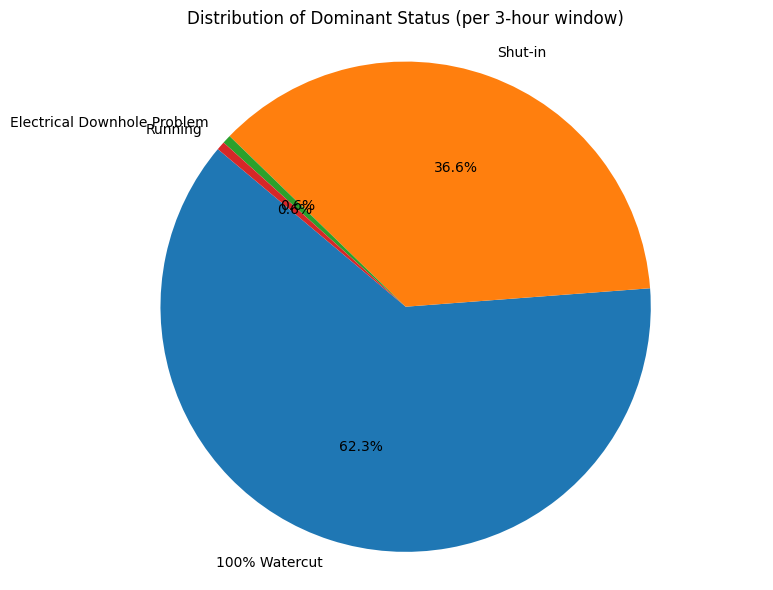

In [286]:
import matplotlib.pyplot as plt

# Hitung jumlah kemunculan setiap Dominant Status dalam hasil akhir
status_counts = result_df['Dominant Status'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Status (per 3-hour window)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

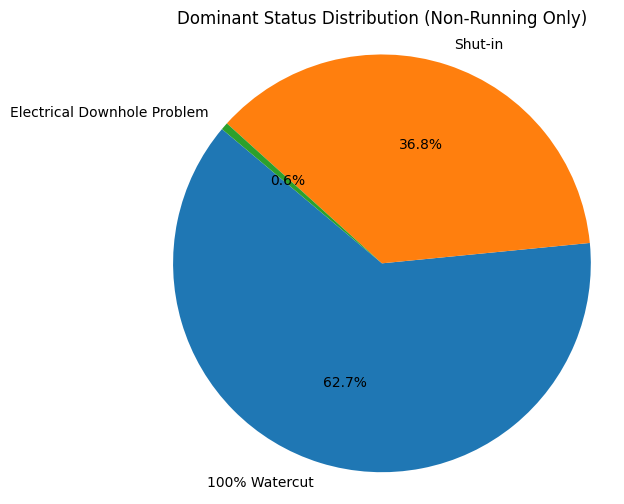

In [287]:
# 2. Pie Chart: Hanya status dominan non-"Running"
status_counts_non_running = result_df[result_df['Dominant Status'] != 'Running']['Dominant Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(status_counts_non_running, labels=status_counts_non_running.index, autopct='%1.1f%%', startangle=140)
plt.title('Dominant Status Distribution (Non-Running Only)')
plt.axis('equal')  # Circle
plt.show()

In [288]:
filtered_df.to_csv('prediction_results_30menit_30Maret2025.csv', index=False)

In [289]:
result_df.to_csv('result_df_3 jam.csv', index=False)

In [290]:
prediction_results_df.to_csv('prediction_results_30menit.csv', index=False)